<a href="https://colab.research.google.com/github/amirda9/wikipedia_Word2vec/blob/main/wikipedia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import sys
from sklearn.decomposition import PCA,KernelPCA
import gensim
import json
import re

In [2]:
with open('/content/drive/MyDrive/wikipedia/dataset.json') as f:
  data = f.read()
data = data.split("\n")
# data = json.loads(data[0])
print(len(data))
datas = [json.loads(obj) for obj in data[:10000]]
data_text = [data["Text"] for data in datas]





100001


In [3]:
print(data_text[1])

ویکی‌پدیا یک دانشنامه اینترنتی چندزبانه با محتویات آزاد است که با همکاری افراد داوطلب نوشته می‌شود و هر کسی که به اینترنت دسترسی داشته باشد می‌تواند مقالات آن را ویرایش کند. نام ویکی‌پدیا واژه‌ای ترکیبی است که از واژه‌های ویکی (وبگاه مشارکتی) و انسایکلو پدیا (Encyclo pedia ) (دانشنامه یا دائرهالمعارف) گرفته شده‌است. هدف ویکی‌پدیا آفرینش و انتشار جهانی یک دانشنامه آزاد به تمامی زبان‌های زنده دنیاست.
ویکی‌پدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ (۲۶ دی ۱۳۷۹) به صورت مکملی برای دانشنامه تخصصی نوپدیا نوشته شد. بنیان‌گذاران آن، «جیمی ولز» و «لری سنگر» هستند. هم‌اکنون بنیاد غیرانتفاعی ویکی‌مدیا پروژه ویکی‌پدیا را پشتیبانی می‌کند. میزبان‌های اینترنتی اصلی این وبگاه در شهر تامپای فلوریدا هستند. همچنین میزبان‌های اضافی دیگری هم در شهرهای آمستردام و سئول به این وبگاه یاری می‌رسانند.
ویکی‌پدیا از پایان آوریل ۲۰۰۷ تاکنون، یکی از ۱۰ وبگاه برتر جهان از لحاظ شمار بازدیدکنندگان بوده‌است که بیش از نیمی از بازدیدها به ویکی‌پدیای انگلیسی مربوط می‌شود.
در میان تمام زبان‌های ویکی‌پدیا تا دسامبر ۲۰۱۵ (آذر ۱۳۹۴

In [4]:
# TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(r"[-()\"#/@;:<>{}=~|.?,a-z,A-Z,0-9]", ' ', str(text)).strip()
    tokens = []
    for token in text.split():
        tokens.append(token)
    return " ".join(tokens)

In [5]:
my = preprocess(data_text[1])
print(my)

ویکی‌پدیا یک دانشنامه اینترنتی چندزبانه با محتویات آزاد است که با همکاری افراد داوطلب نوشته می‌شود و هر کسی که به اینترنت دسترسی داشته باشد می‌تواند مقالات آن را ویرایش کند نام ویکی‌پدیا واژه‌ای ترکیبی است که از واژه‌های ویکی وبگاه مشارکتی و انسایکلو پدیا دانشنامه یا دائرهالمعارف گرفته شده‌است هدف ویکی‌پدیا آفرینش و انتشار جهانی یک دانشنامه آزاد به تمامی زبان‌های زنده دنیاست ویکی‌پدیای انگلیسی در تاریخ ۱۵ ژانویه ۲۰۰۱ ۲۶ دی ۱۳۷۹ به صورت مکملی برای دانشنامه تخصصی نوپدیا نوشته شد بنیان‌گذاران آن، «جیمی ولز» و «لری سنگر» هستند هم‌اکنون بنیاد غیرانتفاعی ویکی‌مدیا پروژه ویکی‌پدیا را پشتیبانی می‌کند میزبان‌های اینترنتی اصلی این وبگاه در شهر تامپای فلوریدا هستند همچنین میزبان‌های اضافی دیگری هم در شهرهای آمستردام و سئول به این وبگاه یاری می‌رسانند ویکی‌پدیا از پایان آوریل ۲۰۰۷ تاکنون، یکی از ۱۰ وبگاه برتر جهان از لحاظ شمار بازدیدکنندگان بوده‌است که بیش از نیمی از بازدیدها به ویکی‌پدیای انگلیسی مربوط می‌شود در میان تمام زبان‌های ویکی‌پدیا تا دسامبر ۲۰۱۵ آذر ۱۳۹۴ بیش از ۱۴۱ میلیون صفحه وجود دارد

In [6]:
documents = [preprocess(_text).split() for _text in data_text] 

In [7]:

w2v_model = gensim.models.word2vec.Word2Vec(size = 30, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

w2v_model.build_vocab(documents)

words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)


w2v_model.train(documents, total_examples=len(documents), epochs=8)
w2v_model.most_similar("نفت")


Vocab size 36036


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  from ipykernel import kernelapp as app


[('نفتی', 0.8550293445587158),
 ('نفت،', 0.7946971654891968),
 ('صنعت', 0.7367705702781677),
 ('درآمدهای', 0.7260109782218933),
 ('ملی\u200cشدن', 0.7188082933425903),
 ('کویت', 0.7122741937637329),
 ('معادن', 0.711571991443634),
 ('صادرات', 0.711018979549408),
 ('بهره\u200cبرداری', 0.7102603912353516),
 ('پتروشیمی', 0.6819555163383484)]

In [8]:
red_dims =2
pca =  KernelPCA(n_components = red_dims , kernel="cosine")
# X_train = z - np.mean(z)
X_new_final = pca.fit_transform(w2v_model.wv.vectors)

In [11]:
word = np.array(words)

In [28]:
mine = list(w2v_model.wv.vocab.keys())
mine[1]

'مقاله\u200cهای'

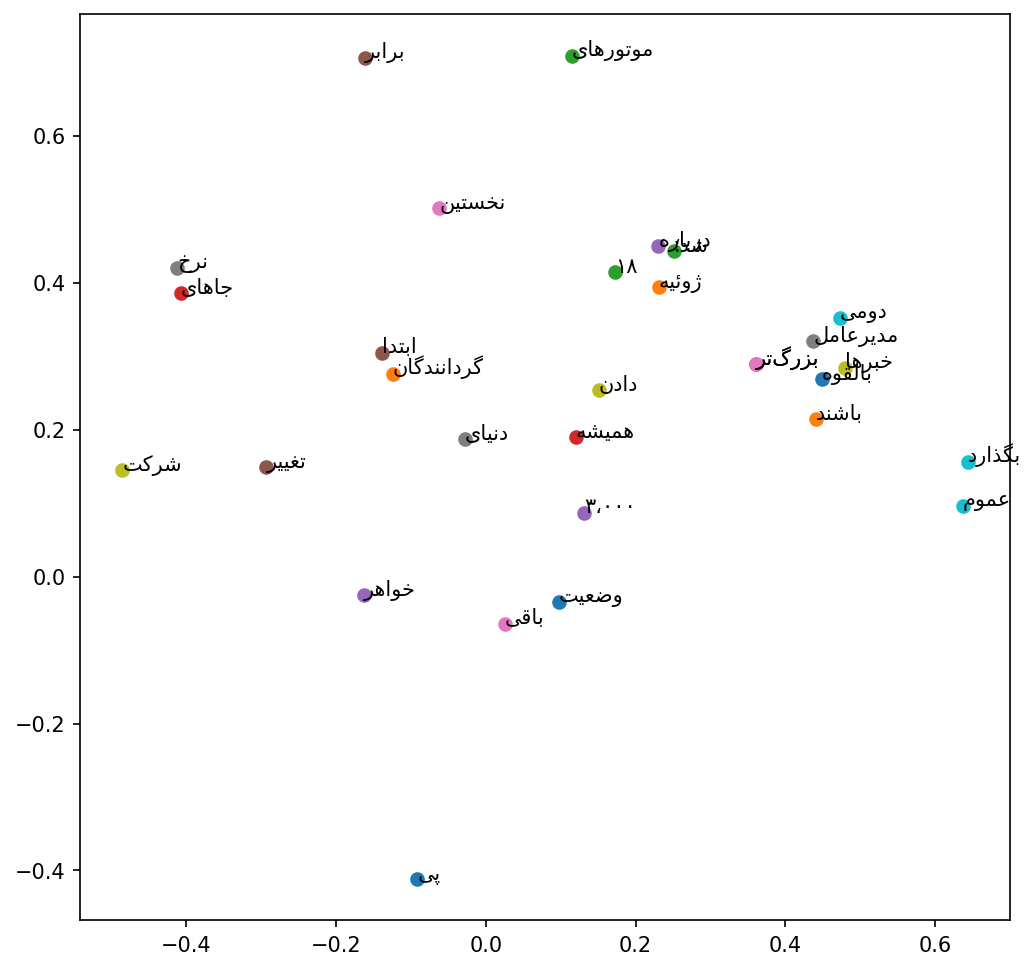

In [46]:
import random
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
plt.figure(figsize=(8, 8), dpi=15 0)
for i in range(30):
  rand=random.randint(0,1000)
  plt.scatter(X_new_final[rand,0],X_new_final[rand,1])
  temp = reshaped_text = arabic_reshaper.reshape(mine[rand])
  temp = get_display(temp, upper_is_rtl=True)
  plt.annotate(temp,[X_new_final[rand,0],X_new_final[rand,1]])